# Tarea 2 - Ignacio Vargas Cordero

Como siempre, documenten **todo** lo que hacen en el notebook

Se recomienda que *colaboren* (equipos de máximo dos personas) en la tarea.

## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

In [1]:
#randn
#generar 10000 valores random que sean Float64 
#construir funcion histograma
#esta debe regresar vector tamano NHist (argumento de funcion histograma)
#vector NHist contiene frecuencias sin normalizar 
#primer componente vector corresponde a numero valores generados random que caen en intervalo (bin) [x0,x1)
#segunda componente caen en [x1,x2) etc hasta [xnhist-1,xnhist) donde tamano de los dos intervalos es el mismo
#tamano intervalos corresponde a delta_x=(sup(x)-inf(x)/nhist)

#dibujar histograma 
#dibujar con PyPlot(matplotlib) de los datos directamente

function histograma(Arreglo::Array{Float64,1}, NHist::Int64)
    N = length(Arreglo)
    N == 0 ? error("Arreglo vacio."):
    (NHist <= 0 || N < NHist) ? error("NHist no puede ser menor o igual a cero, o mayor a la longitud del Arreglo.") :
    tick = sort(Arreglo)
    delta_x= (tick[end] - tick[1])/NHist
    vector_resultado = zeros(NHist)
    for i in 1:NHist
        incremento = 0
        x_i = i*delta_x + tick[1]
        last = round(Int64,sum(vector_resultado[1:i]) + 1)
        for r in last:N
            check = tick[r]
            check < x_i ? incremento += 1 : break
        end
        vector_resultado[i] = incremento
    end
    vector_resultado[end] += 1
    indice = collect(1:NHist)
    indice, vector_resultado
end

histograma (generic function with 1 method)

In [2]:
using PyPlot
num_aleatorio = randn(10000);

In [3]:
ind, hist = histograma(num_aleatorio, 100);

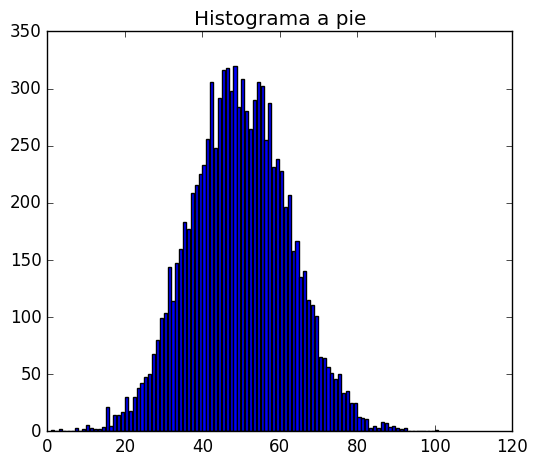

PyObject <matplotlib.text.Text object at 0x7f1615a96750>

In [4]:
figure(figsize=(6,5))
bar(ind,hist)
title("Histograma a pie")

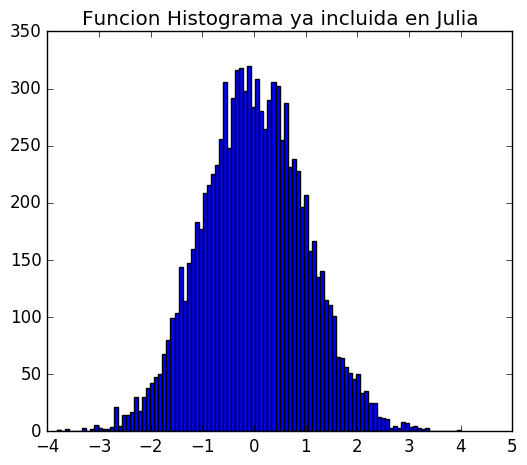

In [5]:
figure(figsize = (6,5))
plt[:hist](num_aleatorio,100)
title("Funcion Histograma ya incluida en Julia")
show()

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.


## 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.